In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

In [86]:
add="D:/Anaconda/Anaconda3/kaggle-competitions_and_other_projects/kobe_byrant/black_mamba/data.csv"

df=pd.read_csv(add, header=0, sep=',')

In [87]:
df.shot_made_flag.value_counts()

0.0    14232
1.0    11465
Name: shot_made_flag, dtype: int64

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
action_type           30697 non-null object
combined_shot_type    30697 non-null object
game_event_id         30697 non-null int64
game_id               30697 non-null int64
lat                   30697 non-null float64
loc_x                 30697 non-null int64
loc_y                 30697 non-null int64
lon                   30697 non-null float64
minutes_remaining     30697 non-null int64
period                30697 non-null int64
playoffs              30697 non-null int64
season                30697 non-null object
seconds_remaining     30697 non-null int64
shot_distance         30697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             30697 non-null object
shot_zone_area        30697 non-null object
shot_zone_basic       30697 non-null object
shot_zone_range       30697 non-null object
team_id               30697 non-null int64
team_name         

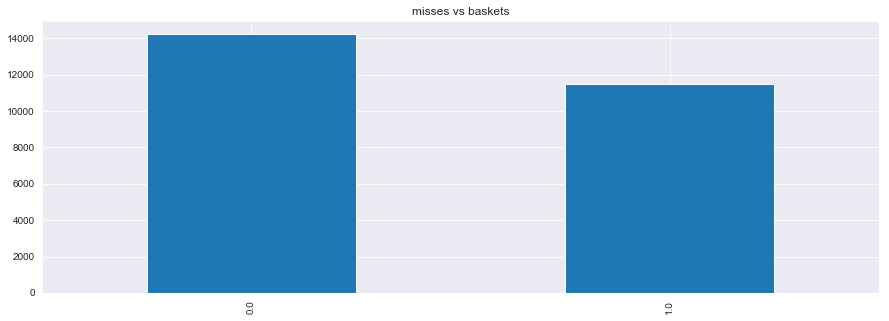

In [89]:
plt.figure(figsize=(15,5))
df.shot_made_flag.value_counts().plot(kind='bar')
plt.title('misses vs baskets')
plt.show()

#### missing values 

In [90]:
df.shot_made_flag.isnull().sum()

5000

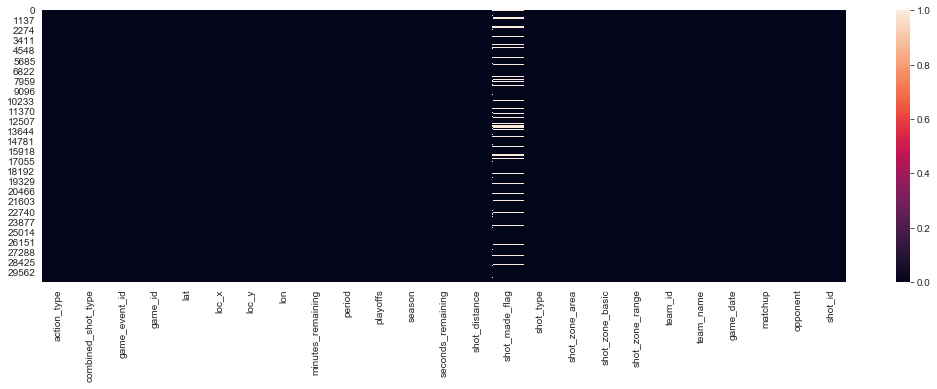

In [91]:
# analysis of missing values
plt.figure(figsize=(18,5))
sns.heatmap(df.isnull())

In [92]:
# no missing values except shot_made_flag column, which is our target.
# rows with null values form the test data, the remaining part is our training data.

#### lat and lon 

Text(0.5, 1.0, 'scatter plot of loc_x and loc_y values')

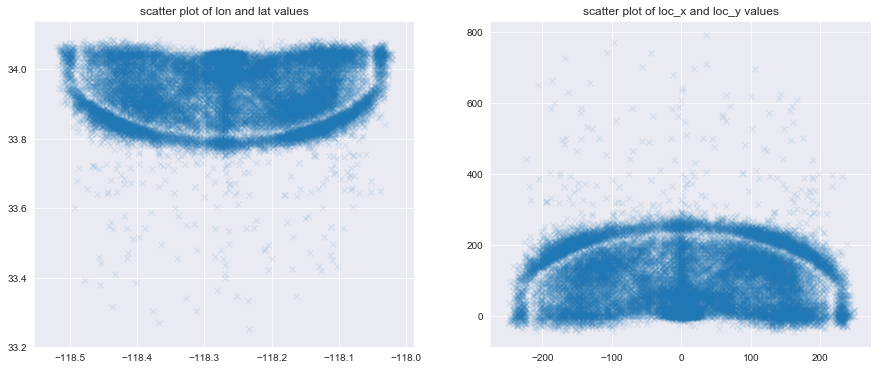

In [93]:
#lat and lon columns

plt.figure(figsize=(15,6))
plt.subplot(121)
plt.scatter(df.lon, df.lat, marker='x', alpha=0.1)
plt.title('scatter plot of lon and lat values')
plt.subplot(122)
plt.scatter(df.loc_x, df.loc_y, marker='x', alpha=0.1)
plt.title('scatter plot of loc_x and loc_y values')

In [94]:
# It seems that lat and lon values are linear transformation of loc_x and loc_y values, so delete lat and lon columns

if 'lat' in df.columns:
    df.drop(labels='lat',axis=1,inplace=True)
if 'lon' in df.columns:
    df.drop(labels='lon',axis=1,inplace=True)

#### team_name 

In [95]:
df.team_name.value_counts()

Los Angeles Lakers    30697
Name: team_name, dtype: int64

In [96]:
# team_name column contains just one name, so drop this column

if 'team_name' in df.columns:
    df.drop(labels='team_name', inplace=True, axis=1)

#### shot_id

In [97]:
# the column shot_id is almost the same as the index of the dataframe, so delete it

if 'shot_id' in df.columns:
    df.drop(labels='shot_id', inplace=True, axis=1)

#### game_id and game_event_id

In [98]:
df.game_id.value_counts().head(10)

21501228    50
20200069    47
20500591    46
20600431    45
20700553    44
20601081    44
21200398    41
20500480    41
20200743    41
20200127    40
Name: game_id, dtype: int64

In [99]:
# we see that the game_id 21501228 is repeated 50 times in game_id column.
# This means that  Kobe had 50 attempts in this match and corresponding to each attempt we have one id 
# in game_event_id column. By game_id and game event_id we can order the attempts. But such information
# may lead to data leakage. I think we cannot use general performance information in one match to
# predict whether an attempt in that match is a basket or miss. So delete game_id and game_event_id

if 'game_id' in df.columns:
    df.drop(labels='game_id', inplace=True, axis=1)
if 'game_event_id' in df.columns:
    df.drop(labels='game_event_id', inplace=True, axis=1)

#### matchup and opponent 

In [100]:
df.matchup.head(20)

0       LAL @ POR
1       LAL @ POR
2       LAL @ POR
3       LAL @ POR
4       LAL @ POR
5       LAL @ POR
6       LAL @ POR
7       LAL @ POR
8       LAL @ POR
9       LAL @ POR
10      LAL @ POR
11    LAL vs. UTA
12    LAL vs. UTA
13    LAL vs. UTA
14    LAL vs. UTA
15    LAL vs. UTA
16    LAL vs. UTA
17    LAL vs. UTA
18    LAL vs. UTA
19    LAL vs. UTA
Name: matchup, dtype: object

In [101]:
# check whether each matchup starts with 'LAL' or not
# maybe this column gives an information about the location of match, home or away?

df.matchup.str.startswith('LAL').value_counts()

True    30697
Name: matchup, dtype: int64

In [102]:
# every matchup starts with LAL. However, every matchup has two kind of separators: @ or vs.
# Some internet search gives that 'vs.' means Lakers is home team


df['home_or_away']=df.matchup.apply(lambda x: 'home' if x.find('@')==-1 else 'away')
df['home_or_away']=df['home_or_away'].astype('category')

In [103]:
# check whether  the second part of matchup column matches with opponent column

def second_part(x):
    # x:string
    if x.find('@')>=0:
        return x.split('@')[1].strip().upper()
    else:
        return x.split('vs.')[1].strip().upper()
    


(df.matchup.apply(func=second_part).values!=df.opponent.str.upper().values).sum()        

525

In [104]:

df.matchup.apply(func=second_part).unique()

array(['POR', 'UTA', 'VAN', 'LAC', 'HOU', 'SAS', 'DEN', 'SAC', 'CHI',
       'GSW', 'MIN', 'IND', 'SEA', 'DAL', 'PHI', 'DET', 'MIL', 'TOR',
       'MIA', 'PHX', 'CLE', 'NJN', 'NYK', 'CHH', 'WAS', 'ORL', 'ATL',
       'MEM', 'BOS', 'NOH', 'UTH', 'SAN', 'NOK', 'PHO', 'CHA', 'OKC',
       'BKN', 'NOP'], dtype=object)

In [105]:
df.opponent.unique()

array(['POR', 'UTA', 'VAN', 'LAC', 'HOU', 'SAS', 'DEN', 'SAC', 'CHI',
       'GSW', 'MIN', 'IND', 'SEA', 'DAL', 'PHI', 'DET', 'MIL', 'TOR',
       'MIA', 'PHX', 'CLE', 'NJN', 'NYK', 'CHA', 'WAS', 'ORL', 'ATL',
       'MEM', 'BOS', 'NOH', 'NOP', 'OKC', 'BKN'], dtype=object)

In [106]:
set(df.matchup.apply(func=second_part).unique()).difference(df.opponent.unique())

{'CHH', 'NOK', 'PHO', 'SAN', 'UTH'}

In [107]:
set(df.opponent.unique()).difference(df.matchup.apply(func=second_part).unique())

set()

In [108]:
# there are a few  differences in abbreviations, maybe due to some name changes of nba teams in time
# we cannot gain any real information from the matchup column, opponent column is sufficient, so delete the former one

if 'matchup' in df.columns:
    df.drop(labels='matchup', axis=1,inplace=True)

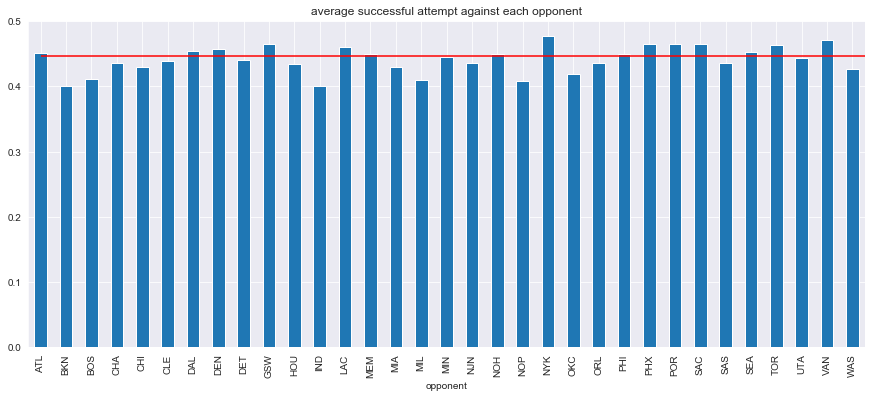

In [109]:
average_successful_attempt=df.shot_made_flag.mean()
plt.figure(figsize=(15,6))
df.groupby('opponent')['shot_made_flag'].mean().plot(kind='bar')
plt.hlines(average_successful_attempt, 0,33, colors='red')
plt.title('average successful attempt against each opponent')
plt.show()

In [110]:
#convert opponent column to a categorical variable
df['opponent']=df['opponent'].astype('category')

#### team_id 

In [111]:
df.team_id.value_counts()

1610612747    30697
Name: team_id, dtype: int64

In [112]:
# since team_id feature is constant, delete it

if 'team_id' in df.columns:
    df.drop(labels='team_id', axis=1,inplace=True)

#### shot_type 

In [113]:
df.shot_type.value_counts()

2PT Field Goal    24271
3PT Field Goal     6426
Name: shot_type, dtype: int64

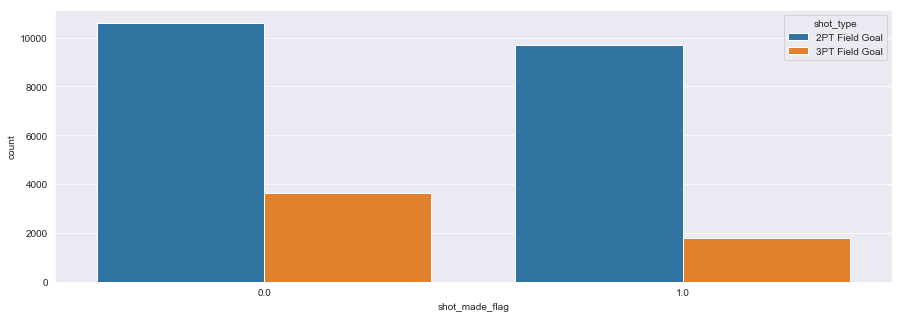

In [114]:
plt.figure(figsize=(15,5))
sns.countplot('shot_made_flag',hue='shot_type',data=df[df.shot_made_flag.notnull()])

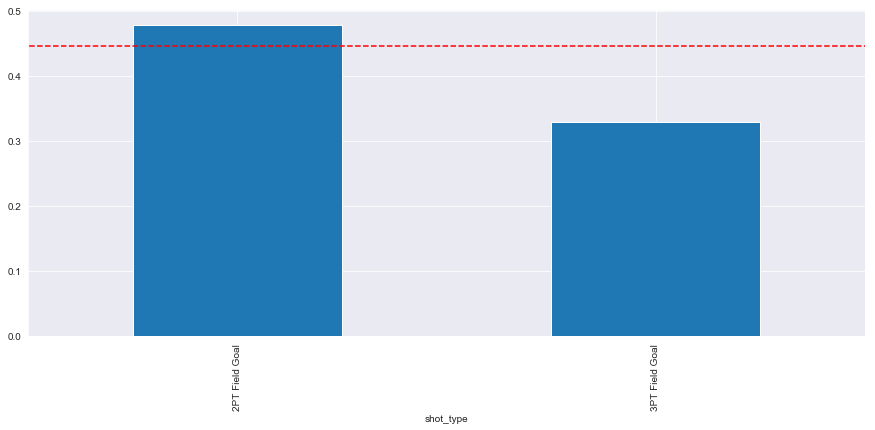

In [115]:
# rate of successfull attempts in two categories of shot-type
plt.figure(figsize=(15,6))
df.groupby('shot_type')['shot_made_flag'].mean().plot(kind='bar')
plt.hlines(average_successful_attempt, -5,30, colors='red',linestyles='dashed')
plt.show()

In [116]:
#convert shot_type into categorical variable

df['shot_type']=df.shot_type.astype('category')

#### game_date  and season

In [117]:
# convert game_date column to datetime object

df['game_date']=pd.to_datetime(df['game_date'])

In [118]:
#convert season into categorical variable

df['season']=df.season.astype('category')

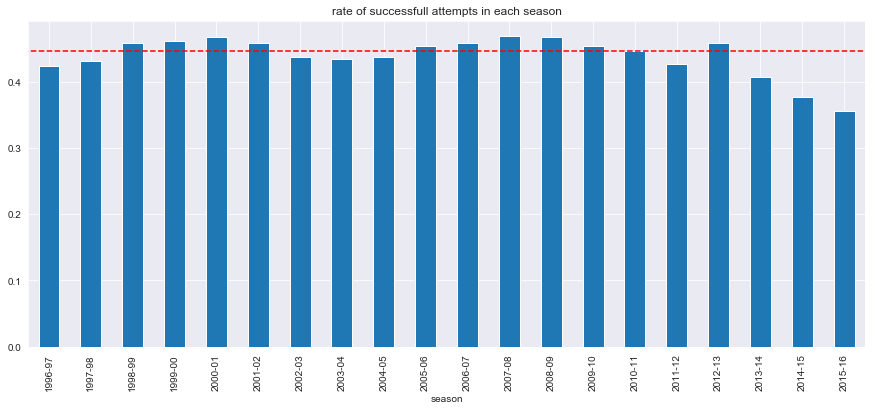

In [119]:
# rate of successfull attempts in each season
plt.figure(figsize=(15,6))
df.groupby('season')['shot_made_flag'].mean().plot(kind='bar')
plt.hlines(average_successful_attempt, -5,30, colors='red',linestyles='dashed')
plt.title('rate of successfull attempts in each season')
plt.show()

In [120]:
#convert game_date into new categorical variables such as year, day, month,...

df['weekofyear']=df.game_date.apply(lambda x:x.weekofyear)
df['dayofweek']=df.game_date.apply(lambda x:x.dayofweek)
df['year']=df.game_date.apply(lambda x:x.year)
df['month']=df.game_date.apply(lambda x:x.month)

df['weekofyear']=df['weekofyear'].astype('category')
df['dayofweek']=df['dayofweek'].astype('category')
df['year']=df['year'].astype('category')
df['month']=df['month'].astype('category')


In [121]:
#drop game_date column

if 'game_date' in df.columns:
    df.drop(labels='game_date',axis=1,inplace=True)



#### shot_zone_range 

In [122]:
df.shot_zone_range.value_counts()

Less Than 8 ft.    9398
16-24 ft.          8315
8-16 ft.           6626
24+ ft.            6275
Back Court Shot      83
Name: shot_zone_range, dtype: int64

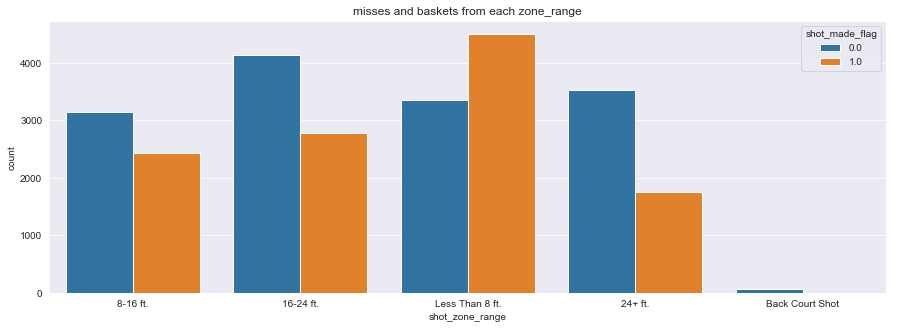

In [123]:
plt.figure(figsize=(15,5))
sns.countplot('shot_zone_range',hue='shot_made_flag',data=df[df.shot_made_flag.notnull()])
plt.title('misses and baskets from each zone_range')
plt.show()

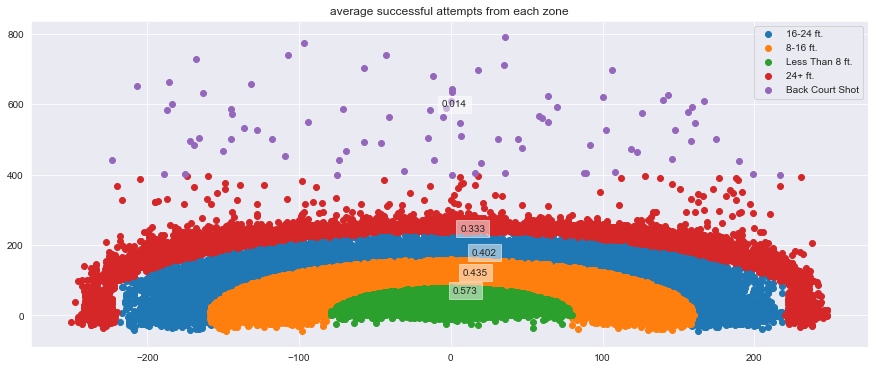

In [124]:
plt.figure(figsize=(15,6))

for zone in df.shot_zone_range.unique():
    plt.scatter(df.loc[df.shot_zone_range==zone,'loc_x'],df.loc[df.shot_zone_range==zone,'loc_y'], label="{}".format(zone))
    tx,ty=df.loc[df.shot_zone_range==zone,'loc_x'].mean(),df.loc[df.shot_zone_range==zone,'loc_y'].mean()
    avg_basket=df.loc[df.shot_zone_range==zone,'shot_made_flag'].mean()
    plt.text(tx,ty+50,round(avg_basket,3),bbox=dict(facecolor='white', alpha=0.5))

plt.title("average successful attempts from each zone")
plt.legend()
plt.show()

In [125]:
#convert shot_zone_range into categorical variable

df['shot_zone_range']=df['shot_zone_range'].astype('category')

#### shot_zone_basic 

In [126]:
df.shot_zone_basic.value_counts()

Mid-Range                12625
Restricted Area           7136
Above the Break 3         5620
In The Paint (Non-RA)     4578
Right Corner 3             387
Left Corner 3              280
Backcourt                   71
Name: shot_zone_basic, dtype: int64

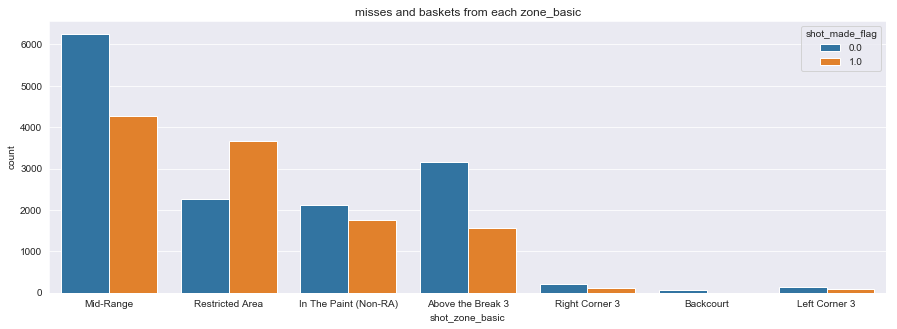

In [127]:
plt.figure(figsize=(15,5))
sns.countplot('shot_zone_basic',hue='shot_made_flag',data=df[df.shot_made_flag.notnull()])
plt.title('misses and baskets from each zone_basic')
plt.show()

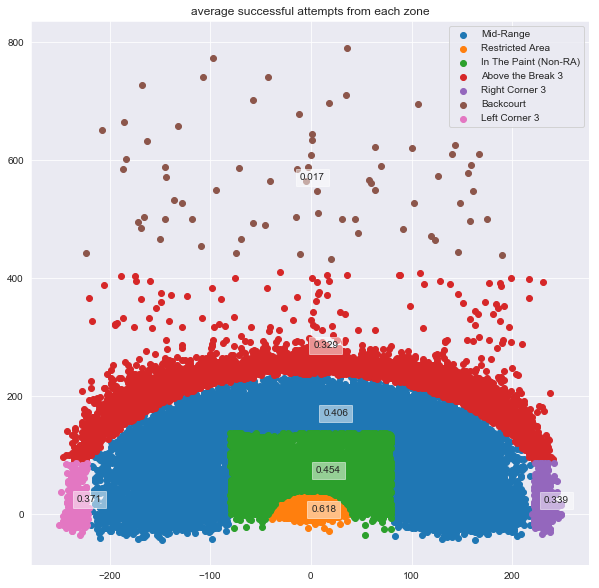

In [128]:
plt.figure(figsize=(10,10))

for zone in df.shot_zone_basic.unique():
    plt.scatter(df.loc[df.shot_zone_basic==zone,'loc_x'],df.loc[df.shot_zone_basic==zone,'loc_y'], label="{}".format(zone))
    tx,ty=df.loc[df.shot_zone_basic==zone,'loc_x'].mean(),df.loc[df.shot_zone_basic==zone,'loc_y'].mean()
    avg_basket=df.loc[df.shot_zone_basic==zone,'shot_made_flag'].mean()
    if zone=='Above the Break 3' or zone=='Mid-Range':
        plt.text(tx,ty+70,round(avg_basket,3),bbox=dict(facecolor='white', alpha=0.5))
    else:
        plt.text(tx,ty,round(avg_basket,3),bbox=dict(facecolor='white', alpha=0.5))

plt.title("average successful attempts from each zone")
plt.legend()
plt.show()

In [129]:
#convert shot_zone_basic into categorical variable

df['shot_zone_basic']=df['shot_zone_basic'].astype('category')


#### shot_zone_area 

In [130]:
df.shot_zone_area.value_counts()

Center(C)                13455
Right Side Center(RC)     4776
Right Side(R)             4588
Left Side Center(LC)      4044
Left Side(L)              3751
Back Court(BC)              83
Name: shot_zone_area, dtype: int64

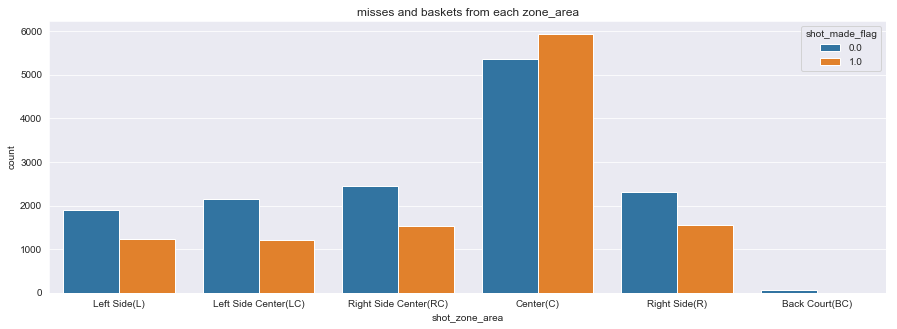

In [131]:
plt.figure(figsize=(15,5))
sns.countplot('shot_zone_area',hue='shot_made_flag',data=df[df.shot_made_flag.notnull()])
plt.title('misses and baskets from each zone_area')
plt.show()

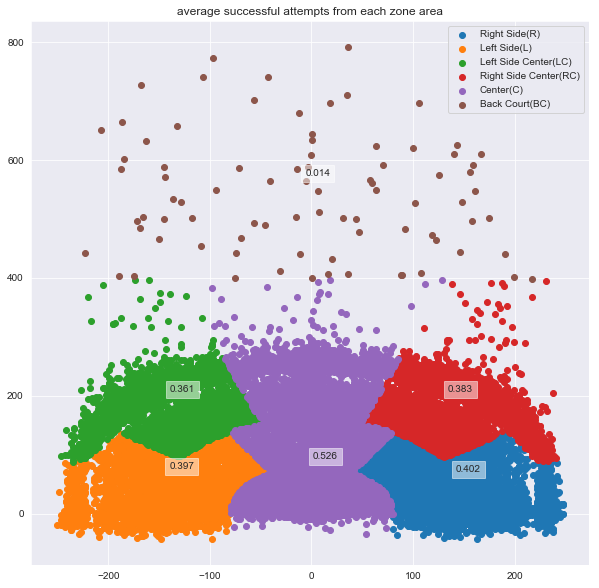

In [132]:
plt.figure(figsize=(10,10))

for zone in df.shot_zone_area.unique():
    plt.scatter(df.loc[df.shot_zone_area==zone,'loc_x'],df.loc[df.shot_zone_area==zone,'loc_y'], label="{}".format(zone))
    tx,ty=df.loc[df.shot_zone_area==zone,'loc_x'].mean(),df.loc[df.shot_zone_area==zone,'loc_y'].mean()
    avg_basket=df.loc[df.shot_zone_area==zone,'shot_made_flag'].mean()
    plt.text(tx,ty+30,round(avg_basket,3),bbox=dict(facecolor='white', alpha=0.5))
    
plt.title("average successful attempts from each zone area")
plt.legend()
plt.show()

**Remarks**:

1. As expected, the distance from the basket increases, the success rate decreases.
2. Kobe attains his maximum in the center, and has more successful in the right than in the left. This suggests that the angle of an attempt has an impact on the success.



In [133]:
#convert shot_zone_area into categorical variable

df['shot_zone_area']=df['shot_zone_area'].astype('category')

#### action_type 

In [134]:
df.action_type.value_counts()

Jump Shot                             18880
Layup Shot                             2567
Driving Layup Shot                     1978
Turnaround Jump Shot                   1057
Fadeaway Jump Shot                     1048
Running Jump Shot                       926
Pullup Jump shot                        476
Turnaround Fadeaway shot                439
Slam Dunk Shot                          411
Reverse Layup Shot                      395
Jump Bank Shot                          333
Driving Dunk Shot                       310
Dunk Shot                               262
Tip Shot                                182
Alley Oop Dunk Shot                     122
Step Back Jump shot                     118
Floating Jump shot                      114
Driving Reverse Layup Shot               97
Hook Shot                                84
Driving Finger Roll Shot                 82
Alley Oop Layup shot                     80
Reverse Dunk Shot                        75
Running Layup Shot              

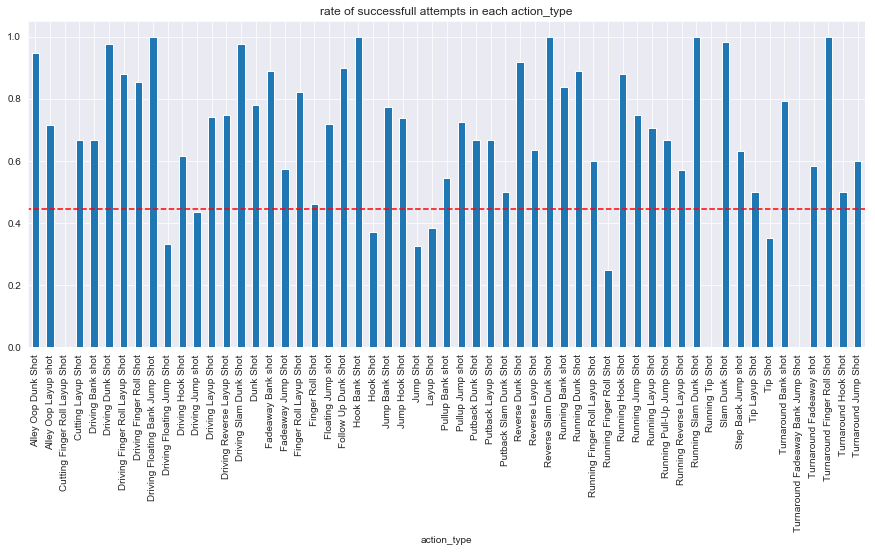

In [135]:
# rate of successfull attempts in each action_type
plt.figure(figsize=(15,6))
df.groupby('action_type')['shot_made_flag'].mean().plot(kind='bar')
plt.hlines(average_successful_attempt, -5,60, colors='red',linestyles='dashed')
plt.title('rate of successfull attempts in each action_type')
plt.show()

In [136]:
#convert shot_type into categorical variable

df['action_type']=df.action_type.astype('category')

#### combined_shot_type 

In [137]:
df.combined_shot_type.value_counts()

Jump Shot    23485
Layup         5448
Dunk          1286
Tip Shot       184
Hook Shot      153
Bank Shot      141
Name: combined_shot_type, dtype: int64

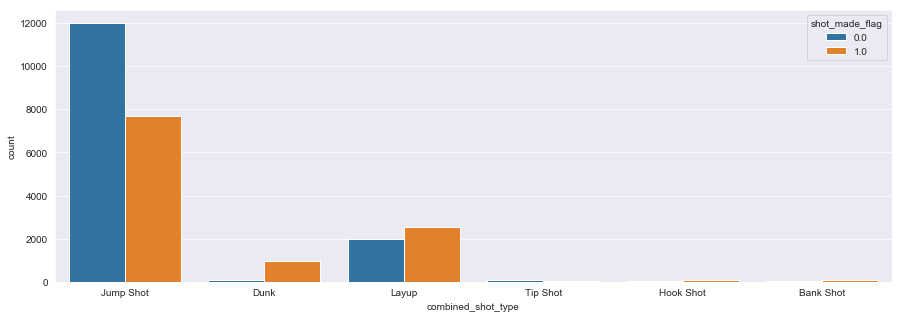

In [138]:
plt.figure(figsize=(15,5))
sns.countplot(x='combined_shot_type',hue='shot_made_flag',data=df[df.shot_made_flag.notnull()])

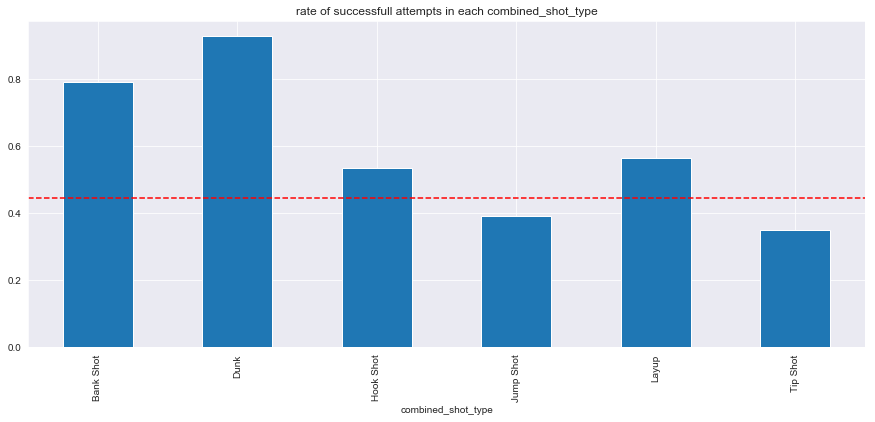

In [139]:
# rate of successfull attempts in each combined_shot_type
plt.figure(figsize=(15,6))
df.groupby('combined_shot_type')['shot_made_flag'].mean().plot(kind='bar')
plt.hlines(average_successful_attempt, -5,60, colors='red',linestyles='dashed')
plt.title('rate of successfull attempts in each combined_shot_type')
plt.show()

In [140]:
#convert combined_shot_type into categorical variable

df['combined_shot_type']=df.combined_shot_type.astype('category')

#### loc_x and loc_y 

In [141]:
# locx and locy are the coordinates on the court where the shot took place.

df.loc_x.describe()

count    30697.000000
mean         7.110499
std        110.124578
min       -250.000000
25%        -68.000000
50%          0.000000
75%         95.000000
max        248.000000
Name: loc_x, dtype: float64

In [142]:
df.loc_y.describe()

count    30697.000000
mean        91.107535
std         87.791361
min        -44.000000
25%          4.000000
50%         74.000000
75%        160.000000
max        791.000000
Name: loc_y, dtype: float64

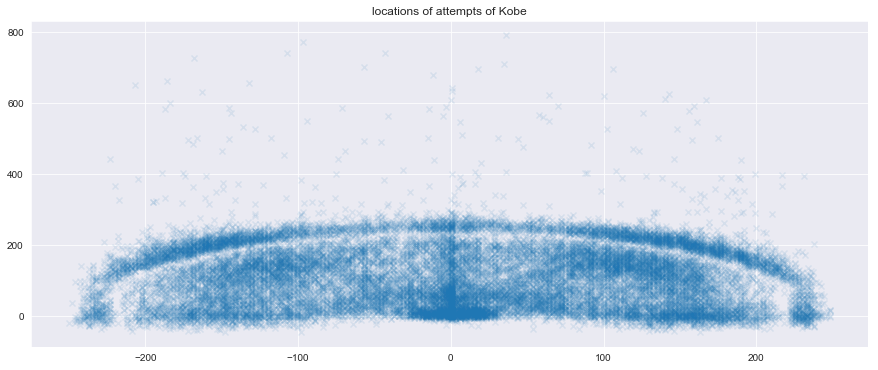

In [143]:
plt.figure(figsize=(15,6))
plt.scatter(df.loc_x, df.loc_y, marker='x', alpha=0.1)
plt.title('locations of attempts of Kobe')
plt.show()

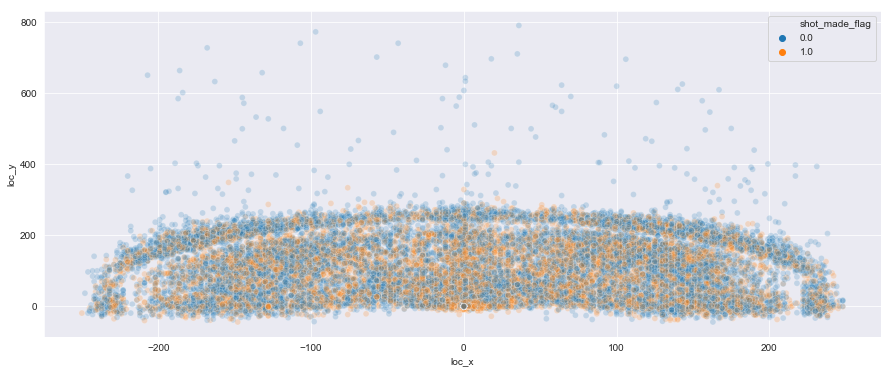

In [144]:
# The boundary of 3pt is very clear from the above plot. As the distance from the basket increases, the number of attempts decreases
#as expected.

plt.figure(figsize=(15,6))
sns.scatterplot(x='loc_x',y='loc_y', hue='shot_made_flag',data=df[df.shot_made_flag.notnull()],alpha=0.2)
plt.show()

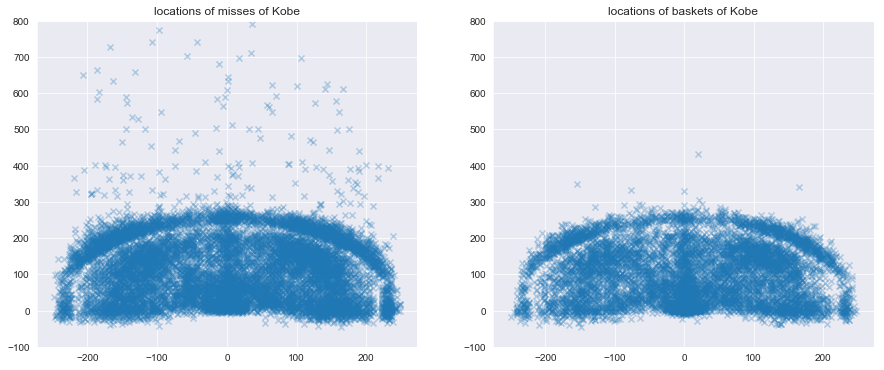

In [145]:
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.scatter(df.loc[df.shot_made_flag==0,'loc_x'], df.loc[df.shot_made_flag==0,'loc_y'], marker='x', alpha=0.3)
plt.title('locations of misses of Kobe')
plt.ylim(-100,800)
plt.subplot(122)
plt.scatter(df.loc[df.shot_made_flag==1,'loc_x'], df.loc[df.shot_made_flag==1,'loc_y'], marker='x', alpha=0.3)
plt.title('locations of baskets of Kobe')
plt.ylim(-100,800)
plt.show()

#### minutes_remaining and seconds_remaining 

In [146]:
df.minutes_remaining.value_counts()

0     3866
4     2855
3     2839
2     2834
1     2734
5     2651
6     2383
7     2215
9     2202
8     2139
10    2122
11    1857
Name: minutes_remaining, dtype: int64

In [147]:
df.seconds_remaining.describe()

count    30697.000000
mean        28.365085
std         17.478949
min          0.000000
25%         13.000000
50%         28.000000
75%         43.000000
max         59.000000
Name: seconds_remaining, dtype: float64

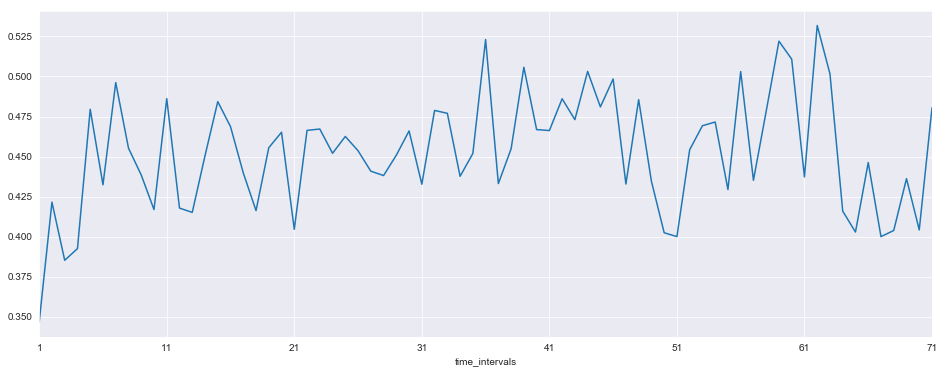

In [148]:
#instead of these two columns, create one column showing remaining time to the end of a period
#in terms of seconds

df['total_seconds_remaining']=df[['minutes_remaining','seconds_remaining']].apply(lambda x:x[0]*60+x[1], axis=1).values
bins_=[0]+list(np.linspace(6,715,71))
df['time_intervals']=pd.cut(df.total_seconds_remaining,bins=bins_,labels=list(range(1,72))).values
plt.figure(figsize=(16,6))
df.groupby('time_intervals')['shot_made_flag'].mean().plot(kind='line')
plt.show()

In [149]:
#there is a sharp decrease in the last 5 seconds of periods, no pattern in the remaining parts

df['in_last_five_seconds']=[1 if val==1 else 0 for val in df.time_intervals.values]
df['in_last_five_seconds']=df['in_last_five_seconds'].astype('category')


if 'minutes_remaining' in df.columns:
    df.drop(labels='minutes_remaining',axis=1,inplace=True)
if 'seconds_remaining' in df.columns:
    df.drop(labels='seconds_remaining',axis=1,inplace=True)
if 'time_intervals' in df.columns:
    df.drop(labels='time_intervals',axis=1,inplace=True)
    
    


#### period and playoffs 

In [150]:
df.period.value_counts()

3    8296
1    8048
4    7260
2    6718
5     330
6      38
7       7
Name: period, dtype: int64

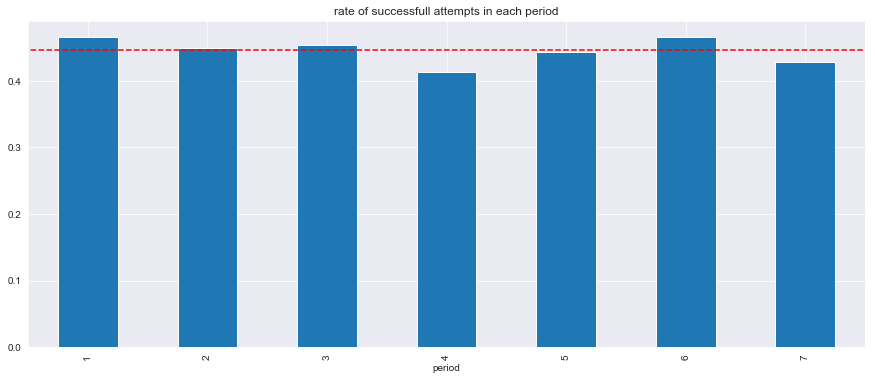

In [151]:
# rate of successfull attempts in each period
plt.figure(figsize=(15,6))
df.groupby('period')['shot_made_flag'].mean().plot(kind='bar')
plt.hlines(average_successful_attempt, -5,60, colors='red',linestyles='dashed')
plt.title('rate of successfull attempts in each period')
plt.show()

In [152]:
df.playoffs.value_counts()

0    26198
1     4499
Name: playoffs, dtype: int64

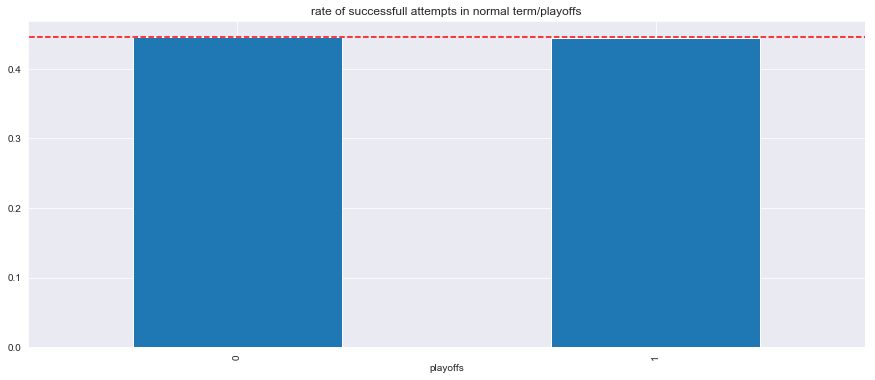

In [153]:
# rate of successfull attempts in two different terms
plt.figure(figsize=(15,6))
df.groupby('playoffs')['shot_made_flag'].mean().plot(kind='bar')
plt.hlines(average_successful_attempt, -5,60, colors='red',linestyles='dashed')
plt.title('rate of successfull attempts in normal term/playoffs')
plt.show()

In [154]:

df['period']=df['period'].astype('category')
df['playoffs']=df['playoffs'].astype('category')


#### shot_distance

In [155]:
df.shot_distance.describe()

count    30697.000000
mean        13.437437
std          9.374189
min          0.000000
25%          5.000000
50%         15.000000
75%         21.000000
max         79.000000
Name: shot_distance, dtype: float64

In [156]:
df.shot_distance.nunique()

74

In [157]:
df.shot_distance.value_counts().head(15)

0     5542
25    1971
24    1507
17    1487
18    1430
16    1406
19    1360
26    1260
20    1202
15    1152
14    1061
13     934
21     805
12     787
7      710
Name: shot_distance, dtype: int64

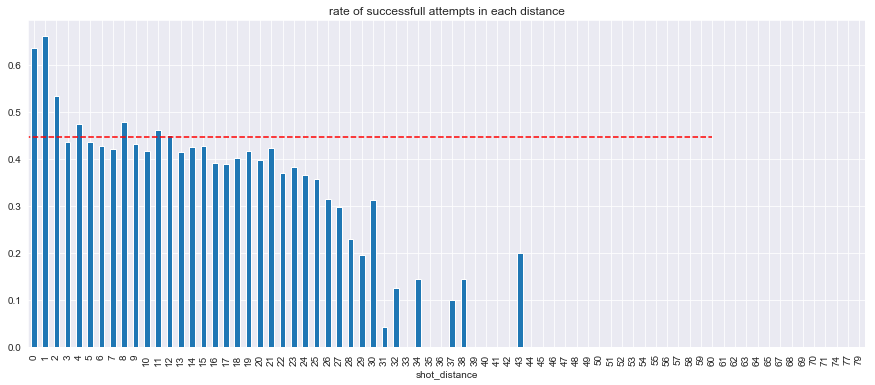

In [158]:
# rate of successfull attempts in each distance
plt.figure(figsize=(15,6))
df.groupby('shot_distance')['shot_made_flag'].mean().plot(kind='bar')
plt.hlines(average_successful_attempt, -5,60, colors='red',linestyles='dashed')
plt.title('rate of successfull attempts in each distance')
plt.show()

In [168]:
df['shot_made_flag']=df['shot_made_flag'].astype('category')


In [169]:
# the last preparation before machine learning algorithms
#convert categorical variables into dummies

df_with_dummies=pd.get_dummies(df.drop(labels='shot_made_flag',axis=1),drop_first=True)
xtrain=df_with_dummies[df.shot_made_flag.notnull()]
ytrain=df.shot_made_flag[df.shot_made_flag.notnull()].values
test=df_with_dummies[df.shot_made_flag.isnull()]

#### Random Forest 

In [173]:
from sklearn.ensemble import RandomForestClassifier


In [175]:

# tuning the parameters of  random forest

from collections import OrderedDict

# aim is to optimize 'name_of_parameter'
def optimization_of_parameter_of_rf(X,y,dict_of_param,name_of_parameter, list_of_values, min_estimators, max_estimators):
    list_of_parameter_dicts=[(value,{**dict_of_param,**{'n_estimators':100, 'warm_start':True, 'oob_score':True, 'n_jobs':-1,
                               'random_state':434,name_of_parameter:value}}) for value in list_of_values]
    
    #if x and y are two dictionaries, {**x,**y} is a way of merging these two
    
    ensemble_clfs = [( "{x}={y}".format(x=name_of_parameter, y=value), RandomForestClassifier(**param_dict))
                 for value, param_dict in list_of_parameter_dicts]

    # Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
    error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)



    for label, clf in ensemble_clfs:
        for i in range(min_estimators, max_estimators + 1):
            clf.set_params(n_estimators=i)
            clf.fit(X, y)

            # Record the OOB error for each `n_estimators=i` setting.
            oob_error = 1 - clf.oob_score_
            error_rate[label].append((i, oob_error))

    # Generate the "OOB error rate" vs. "n_estimators" plot.
    plt.figure(figsize=(15,8))
    for label, clf_err in error_rate.items():
        xs, ys = zip(*clf_err)
        plt.plot(xs, ys, label=label)

    plt.xlim(min_estimators, max_estimators)
    plt.xlabel("n_estimators")
    plt.ylabel("OOB error rate")
    plt.legend(loc="upper right")
    plt.show()

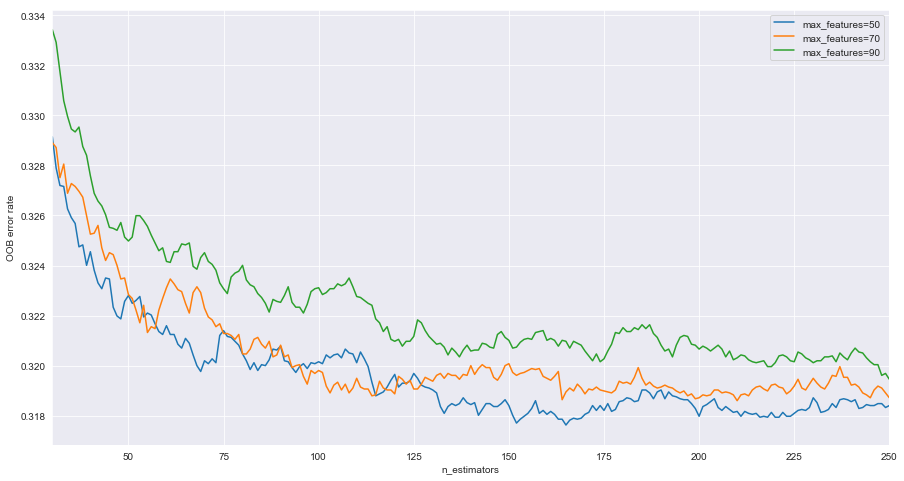

In [176]:
#tune the parameter max_features

optimization_of_parameter_of_rf(xtrain.values, ytrain,{'min_samples_leaf':9},'max_features',[50,70,90],30,250)

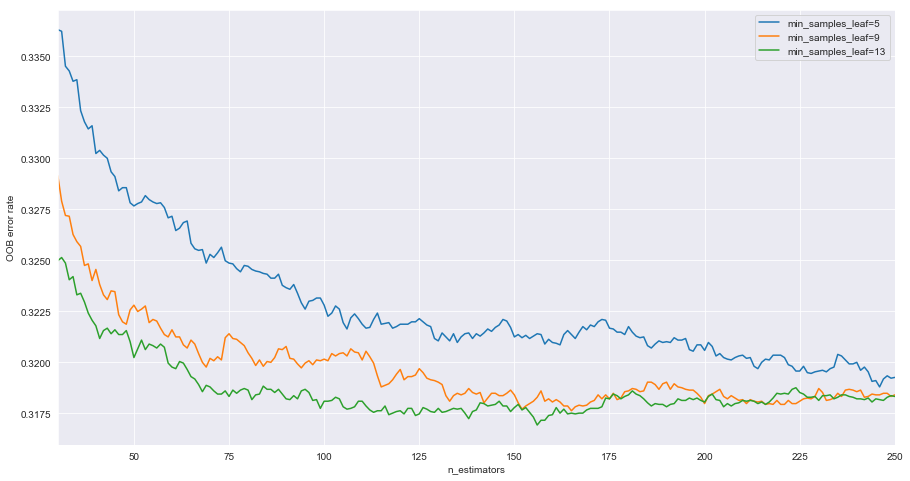

In [177]:
#tune the parameter min_samples_leaf   

optimization_of_parameter_of_rf(xtrain.values, ytrain,{'max_features':50},'min_samples_leaf',[5,9,13],30,250)

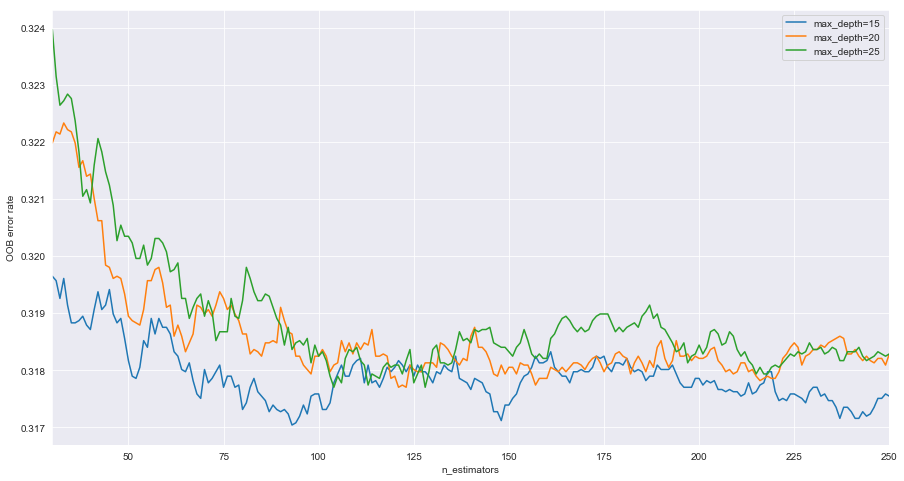

In [178]:
#tune the parameter max_depth

optimization_of_parameter_of_rf(xtrain.values, ytrain,{'max_features':50, 'min_samples_leaf':11},'max_depth',[15,20,25],30,250)

In [179]:
#set up random forest model with the above parameters

rfc=RandomForestClassifier(n_estimators=400,max_features=50,min_samples_leaf=11, max_depth=15)

rfc.fit(xtrain.values, ytrain)

preds=rfc.predict_proba(test)


In [180]:
# prepare a file containing probabilities of being 1 ( shot made) of every shot in test data
# our file gives the logloss-score 0.60066, which falls into the first 62  out of  1117 results

preds_df=pd.DataFrame({'shot_made_flag':preds[:,1]},index=df[df.shot_made_flag.isnull()].index+1)
preds_df.index.name='shot_id'
preds_df.to_csv('kobe_shots_pred3.csv')

In [405]:
preds

array([[0.64957838, 0.35042162],
       [0.69137327, 0.30862673],
       [0.35089312, 0.64910688],
       ...,
       [0.30368753, 0.69631247],
       [0.21153252, 0.78846748],
       [0.50588747, 0.49411253]])

In [182]:
# final result: 0 or 1 (miss or basket)

rfc.predict(test)

array([0., 0., 1., ..., 1., 1., 0.])